<a href="https://colab.research.google.com/github/lilyzhizhou/ML-Final-Project/blob/main/Final_assn_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

Load the data

In [ ]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('datapd.csv')
df.head()

,Unnamed: 0,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex,Patient_ID
0,2,1,63,30.9,NaN,0,1,0,1,0,1,1,1001000000000054
1,2386,1,66,23.6,3.54,1,1,1,0,0,1,1,1001000000004538
2,7781,0,68,34.3,5.55,1,1,1,0,0,1,0,1001000000007331
3,7644,1,73,28.5,3.78,1,1,0,1,1,1,0,1001000000007333
4,2290,0,53,33.4,5.38,0,1,1,0,1,1,0,1001000000009032


Data Exploration/Cleaning

In [ ]:
# checking the data types
df.dtypes

Unnamed: 0             int64
predm                  int64
Age_at_Exam            int64
BMI                  float64
Total_Cholesterol    float64
Depression             int64
HTN                    int64
OA                     int64
COPD                   int64
corstrd_bin            int64
htnmed_bin             int64
Sex                    int64
Patient_ID             int64
dtype: object

In [ ]:
#remove "Patient_ID" column
df=df.drop('Patient_ID', axis=1)

In [ ]:
#check if patient id column is gone
df.dtypes

Unnamed: 0             int64
predm                  int64
Age_at_Exam            int64
BMI                  float64
Total_Cholesterol    float64
Depression             int64
HTN                    int64
OA                     int64
COPD                   int64
corstrd_bin            int64
htnmed_bin             int64
Sex                    int64
dtype: object

Preprocess the data

In [ ]:
# Splitting the original dataset into training, validation, and test sets

# Taking 75% of the data for training
train_df = df.sample(frac = 0.75, random_state=42)

# Removing the training data from the original dataset to get the combined validation and test data
test_df = df.drop(train_df.index)

# Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_df = test_df.sample(frac = 0.5, random_state=42)
test_df = test_df.drop(valid_df.index)

In [ ]:
#Impute Missing Values
imputer = SimpleImputer(strategy='median')
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)
valid_df = pd.DataFrame(imputer.transform(valid_df), columns=valid_df.columns)

In [ ]:
#double check if there are not missing values anymore
print(valid_df.isna().sum())
print(train_df.isna().sum())
print(test_df.isna().sum())

Unnamed: 0           0
predm                0
Age_at_Exam          0
BMI                  0
Total_Cholesterol    0
Depression           0
HTN                  0
OA                   0
COPD                 0
corstrd_bin          0
htnmed_bin           0
Sex                  0
dtype: int64
Unnamed: 0           0
predm                0
Age_at_Exam          0
BMI                  0
Total_Cholesterol    0
Depression           0
HTN                  0
OA                   0
COPD                 0
corstrd_bin          0
htnmed_bin           0
Sex                  0
dtype: int64
Unnamed: 0           0
predm                0
Age_at_Exam          0
BMI                  0
Total_Cholesterol    0
Depression           0
HTN                  0
OA                   0
COPD                 0
corstrd_bin          0
htnmed_bin           0
Sex                  0
dtype: int64


In [ ]:
# Data Preparation

# Extract the 'predm' column as the target variable for training and testing
Y_train = train_df['predm'].to_numpy()
Y_test = test_df['predm'].to_numpy()
Y_valid = valid_df['predm'].to_numpy()

# Extract the features (excluding 'predm') for training and testing
X_train = train_df.drop('predm', axis=1).to_numpy()
X_test = test_df.drop('predm', axis=1).to_numpy()
X_valid = valid_df.drop('predm', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

*Hyperparameter tuning *

MANHATTAN

Check Error rate for k=1 to 40

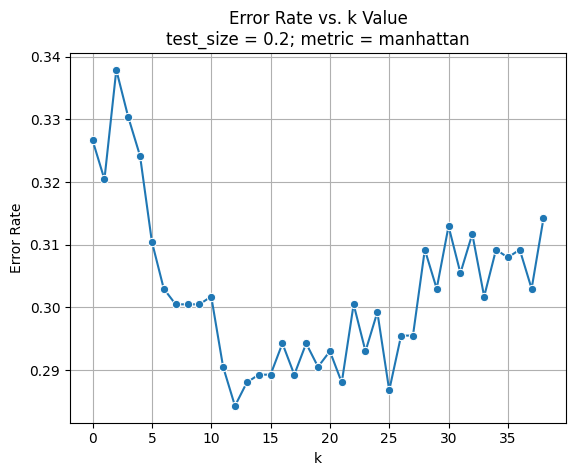

In [ ]:
# Distance metric used
met = 'manhattan'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_valid)
  error_rate.append(1 - accuracy_score(Y_valid, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = manhattan')

plt.show()

k=12 gives optimal k value with lowest error rate but due to increased risk of overfitting, it is wiser to try a lower k value that gives a relatively low error rate, such as k=1. We will try both.

Run KNN with k=12

[[340 130]
 [254  78]]
              precision    recall  f1-score   support

         0.0       0.57      0.72      0.64       470
         1.0       0.38      0.23      0.29       332

    accuracy                           0.52       802
   macro avg       0.47      0.48      0.46       802
weighted avg       0.49      0.52      0.49       802

AUC: 0.6736619348559647


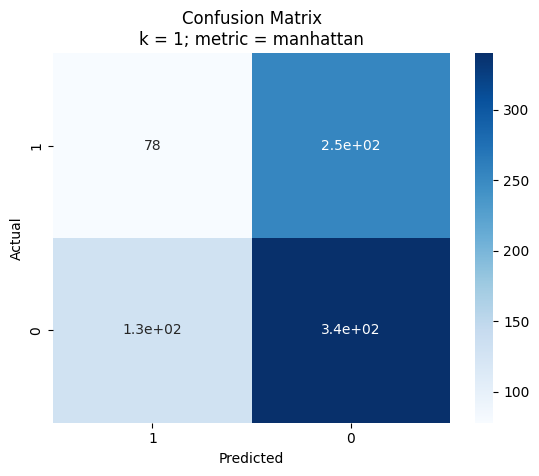

In [ ]:
# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 12, metric = met)   # Set K = 12 (lowest error rate)
knn.fit(X_train, Y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_valid)
auc = roc_auc_score(Y_valid, y_pred)

# Evaluate the model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f'AUC: {auc}')

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met
plt.title(title)

plt.show()

Results:

*   for 0: precision= 57%, recall= 72%, f1-score= 64%
*   for 1: precision= 38%, recall= 23%, f1-score= 29%

Accuracy= 52%
AUC= 67%

Run KNN with k=1

[[263 207]
 [206 126]]
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56       470
         1.0       0.38      0.38      0.38       332

    accuracy                           0.49       802
   macro avg       0.47      0.47      0.47       802
weighted avg       0.49      0.49      0.49       802

AUC: 0.6636444546892307


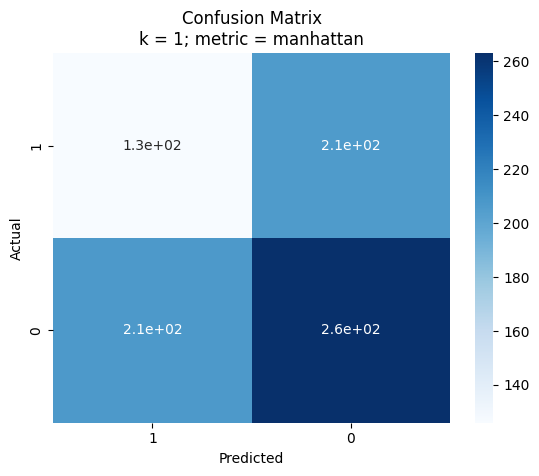

In [ ]:
# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 1, metric = met)   # Set K = 1 (relatively low error rate with lowest risk of overfitting)
knn.fit(X_train, Y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_valid)
auc = roc_auc_score(Y_valid, y_pred)

# Evaluate the model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f'AUC: {auc}')

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met
plt.title(title)

plt.show()

Results:

*   for 0: precision= 56%, recall= 56%, f1-score= 56%
*   for 1: precision= 38%, recall= 38%, f1-score= 38%

Accuracy= 49%
AUC= 66%

EUCLIDEAN

Check error rate

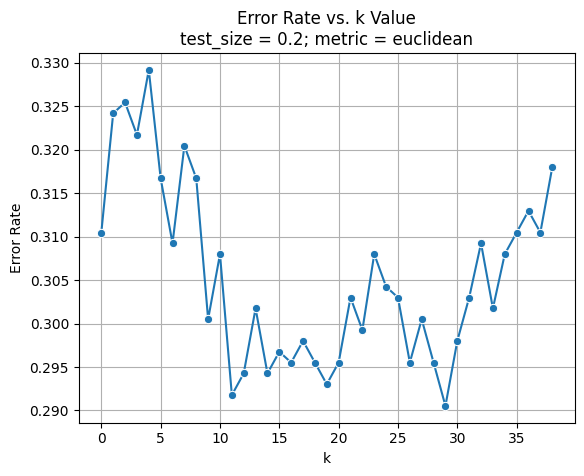

In [ ]:
# Distance metric used
met_e = 'euclidean'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met_e)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_valid)
  error_rate.append(1 - accuracy_score(Y_valid, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = euclidean')

plt.show()

k=29 gives optimal k value with lowest error rate but that would increase risk of overfitting by a lot. Second lowest is 11 which can still lead increased risk of overfitting. Hence, it is wiser to try a lower k value that gives a relatively low error rate, such as k=3. We will try both 3 and 11.

Run KNN for k= 11

[[313 157]
 [241  91]]
              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61       470
         1.0       0.37      0.27      0.31       332

    accuracy                           0.50       802
   macro avg       0.47      0.47      0.46       802
weighted avg       0.48      0.50      0.49       802

AUC: 0.6643968061878509


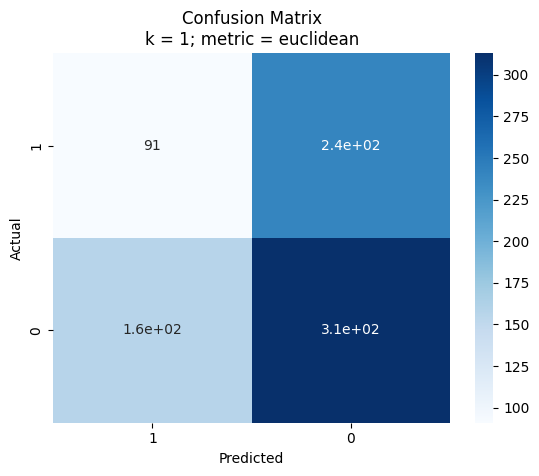

In [ ]:
# Distance metric used
met_e = 'euclidean'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 11, metric = met_e)   # Set K = 11
knn.fit(X_train, Y_train)                                   # Set metric = 'euclidean'

# Predict using test data
y_pred = knn.predict(X_valid)
auc = roc_auc_score(Y_valid, y_pred)

# Evaluate the model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f'AUC: {auc}')

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met_e
plt.title(title)

plt.show()

Results:

*   for 0: precision= 56%, recall= 67%, f1-score= 61%
*   for 1: precision= 37%, recall= 27%, f1-score= 31%

Accuracy= 50%
AUC= 66%

Run KNN for k=3

[[296 174]
 [216 116]]
              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       470
         1.0       0.40      0.35      0.37       332

    accuracy                           0.51       802
   macro avg       0.49      0.49      0.49       802
weighted avg       0.50      0.51      0.51       802

AUC: 0.6555670809402153


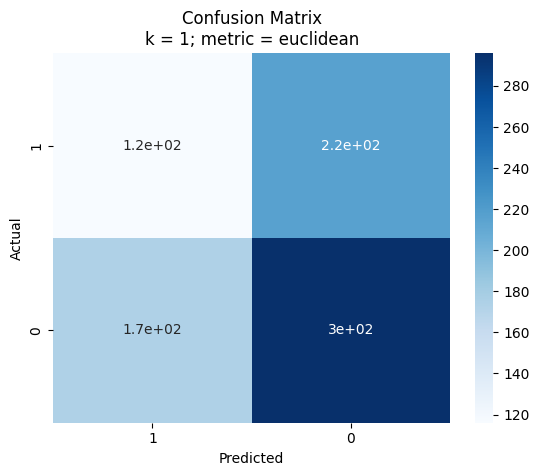

In [ ]:
# Distance metric used
met_e = 'euclidean'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = met_e)   # Set K = 3
knn.fit(X_train, Y_train)                                   # Set metric = 'euclidean'

# Predict using test data
y_pred = knn.predict(X_valid)
auc = roc_auc_score(Y_valid, y_pred)

# Evaluate the model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f'AUC: {auc}')

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met_e
plt.title(title)

plt.show()

Results:

*   for 0: precision= 58%, recall= 63%, f1-score= 60%
*   for 1: precision= 40%, recall= 35%, f1-score= 37%

Accuracy= 51%
AUC= 66%

MINOWSKI

Check error rate

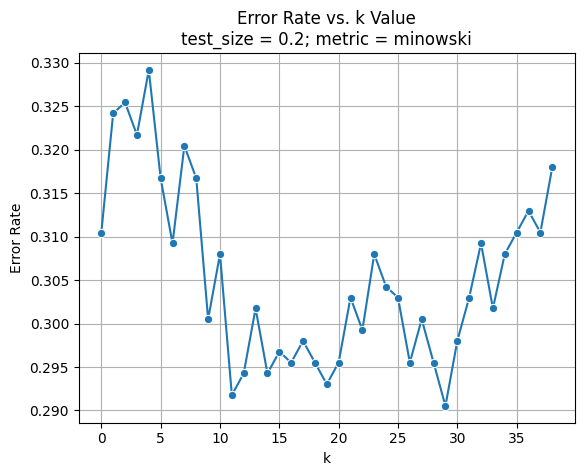

In [ ]:
# Distance metric used
met_m = 'minkowski'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met_m)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_valid)
  error_rate.append(1 - accuracy_score(Y_valid, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = minowski')

plt.show()

Run KNN for k=11

[[313 157]
 [241  91]]
              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61       470
         1.0       0.37      0.27      0.31       332

    accuracy                           0.50       802
   macro avg       0.47      0.47      0.46       802
weighted avg       0.48      0.50      0.49       802

AUC: 0.6643968061878509


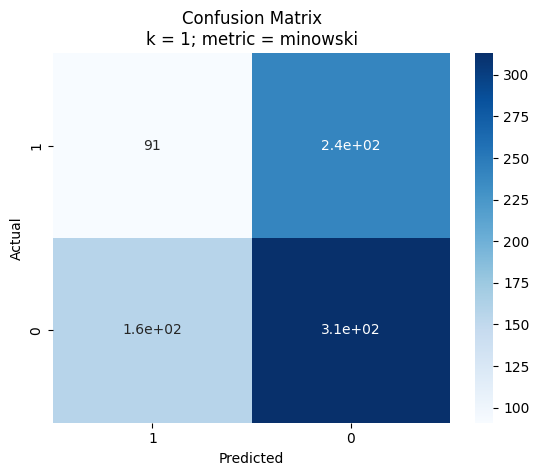

In [ ]:
# Distance metric used
met_m = 'minkowski'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 11, metric = met_m)   # Set K = 11
knn.fit(X_train, Y_train)                                   # Set metric = 'minkowski'

# Predict using test data
y_pred = knn.predict(X_valid)
auc = roc_auc_score(Y_valid, y_pred)

# Evaluate the model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt
print(f'AUC: {auc}')

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met_min
plt.title(title)

plt.show()

Results:

for 0: precision= 56%, recall= 67%, f1-score= 61%
for 1: precision= 37%, recall= 27%, f1-score= 31%
Accuracy= 50% AUC= 66%


Run KNN for k=3

[[296 174]
 [216 116]]
              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       470
         1.0       0.40      0.35      0.37       332

    accuracy                           0.51       802
   macro avg       0.49      0.49      0.49       802
weighted avg       0.50      0.51      0.51       802

AUC: 0.6555670809402153


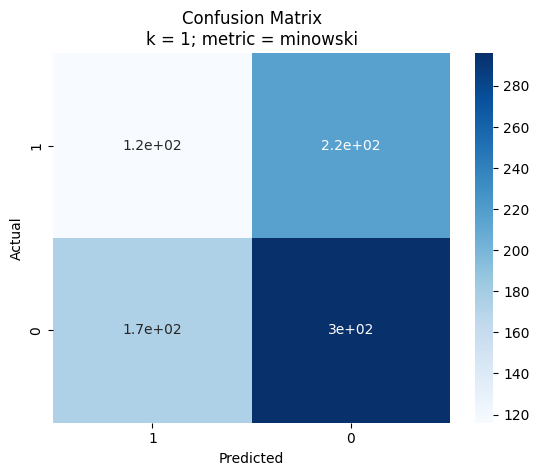

In [ ]:
# Distance metric used
met_m = 'minkowski'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = met_m)   # Set K = 11
knn.fit(X_train, Y_train)                                   # Set metric = 'minkowski'

# Predict using test data
y_pred = knn.predict(X_valid)
auc = roc_auc_score(Y_valid, y_pred)

# Evaluate the model
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt
print(f'AUC: {auc}')

# Get unique classes
classes = df['predm'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(Y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met_min
plt.title(title)

plt.show()

Results:

for 0: precision= 58%, recall= 63%, f1-score= 60%
for 1: precision= 40%, recall= 35%, f1-score= 37%
Accuracy= 51% AUC= 66%


Conclusion: Since we are predicting prediabetes, the recall for 1 should be assessed. Therefore, the highest parameters with the highest recall are manhattan with k=1, with a recall of 38%.